# Redshift Data of DESIJ0201-2739

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.stats import SigmaClip
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from photutils.background import Background2D, MedianBackground
from photutils.segmentation import (
    SourceCatalog,
    SourceFinder,
    deblend_sources,
    detect_sources,
)

In [6]:
data, header = fits.getdata("DESIJ2158+0257_F140W_drz_sci.fits", header=True)

In [7]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [8]:
FILENAME = "legacy_DESIJ2158+0257" #need to be changed for each cluster file
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.007971,8000348966001775,329.687843,2.951757,8000,348966,1775,PSF,1.000,P2,5.227,4.755,1,0
1,0.007667,8000348966001776,329.687601,2.951960,8000,348966,1776,PSF,1.000,P4,2.148,0.813,0,0
2,0.005930,8000348966001783,329.683342,2.952403,8000,348966,1783,DEV,0.014,D2,0.355,0.027,1,1
3,0.007614,8000348966001809,329.690935,2.958908,8000,348966,1809,EXP,0.023,E8,0.342,0.050,1,1
4,0.007077,8000348966001814,329.690368,2.957480,8000,348966,1814,REX,0.016,R4,0.451,0.066,1,1


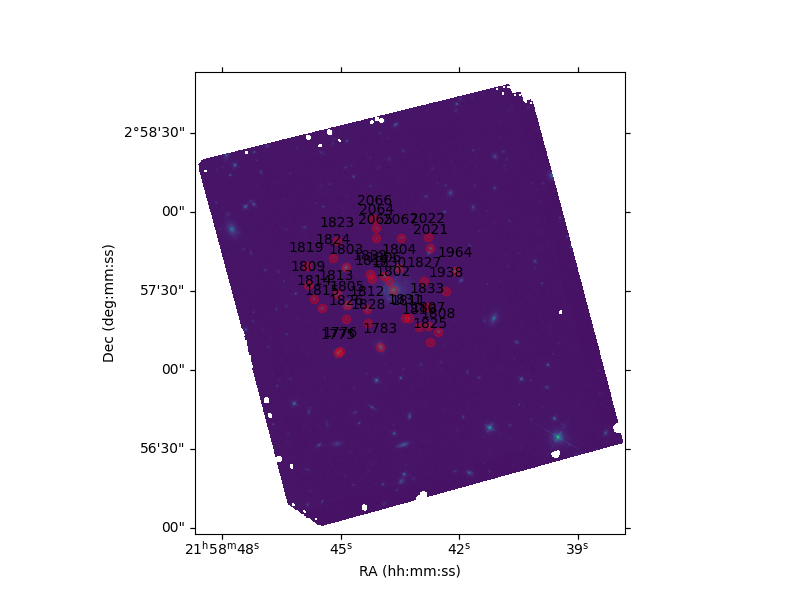

In [9]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
#norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap='viridis')

x_scatter, y_scatter = wcs.all_world2pix(data_legacy['RAJ2000'], data_legacy['DEJ2000'], 0)

# Plot scatter points
ax.scatter(x_scatter, y_scatter, color='red', marker='o', label='J2000 RA/Dec', alpha=0.3)

#write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy['objid'][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(f'{obj_id}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels
ax.set_xlabel('RA (hh:mm:ss)')
ax.set_ylabel('Dec (deg:mm:ss)')

plt.show()

In [10]:
#In degrees
center_x, center_y = 329.6833333, 2.9583333 # RA 21:58:44 DEC 02:57:30
radii = 20 # in arcsec
radii_deg = radii/3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg 
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

630.0884254688369 1129.420675433768


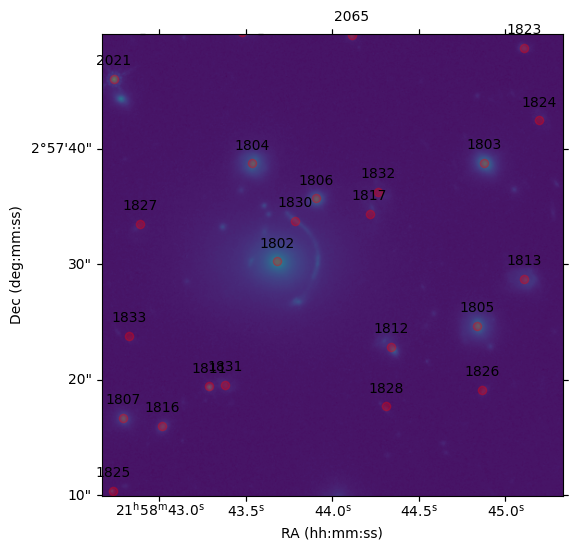

In [12]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
#norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap='viridis')

x_scatter, y_scatter = wcs.all_world2pix(data_legacy['RAJ2000'], data_legacy['DEJ2000'], 0)

# Plot scatter points
ax.scatter(x_scatter, y_scatter, color='red', marker='o', label='J2000 RA/Dec', alpha=0.3)

#write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy['objid'][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(f'{obj_id}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel('RA (hh:mm:ss)')
ax.set_ylabel('Dec (deg:mm:ss)')

In [13]:
data_legacy.sort_values(by="objid")

object_ids = [1802, # central deflector
            1806, 1804, 1817, 1832]

columns_to_drop = ['id', 'RAJ2000', 'DEJ2000', 'release', 'brickid']  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[data_legacy_dropped['objid'].isin(object_ids)]
selected_data_legacy.set_index('objid', inplace=True)

print(selected_data_legacy)

             _r type  pstar gmmcomp  zphot  e_zphot  fclean  fqual
objid                                                             
1802   0.001342  DEV  0.021      D1  0.279    0.019       1      1
1804   0.003102  REX  0.036      R3  0.302    0.050       1      1
1806   0.001638  REX  0.025      R4  0.406    0.146       0      0
1817   0.001512  EXP  0.006      E0  0.823    0.164       0      0
1832   0.002067  REX  0.126      R1  0.734    0.283       0      0
